In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plots import drop_frames_without_results, calculate_failure_rate, min_max_scaling

csv_file = "output/plots/data.csv"

data = pd.read_csv(csv_file)
data = drop_frames_without_results(
    data,
    subset=[
        "accuracy",
        "adv_accuracy",
        "train_time",
        "adv_fit_time",
        "predict_time",
    ],
)
data = calculate_failure_rate(data)
data = min_max_scaling(data)

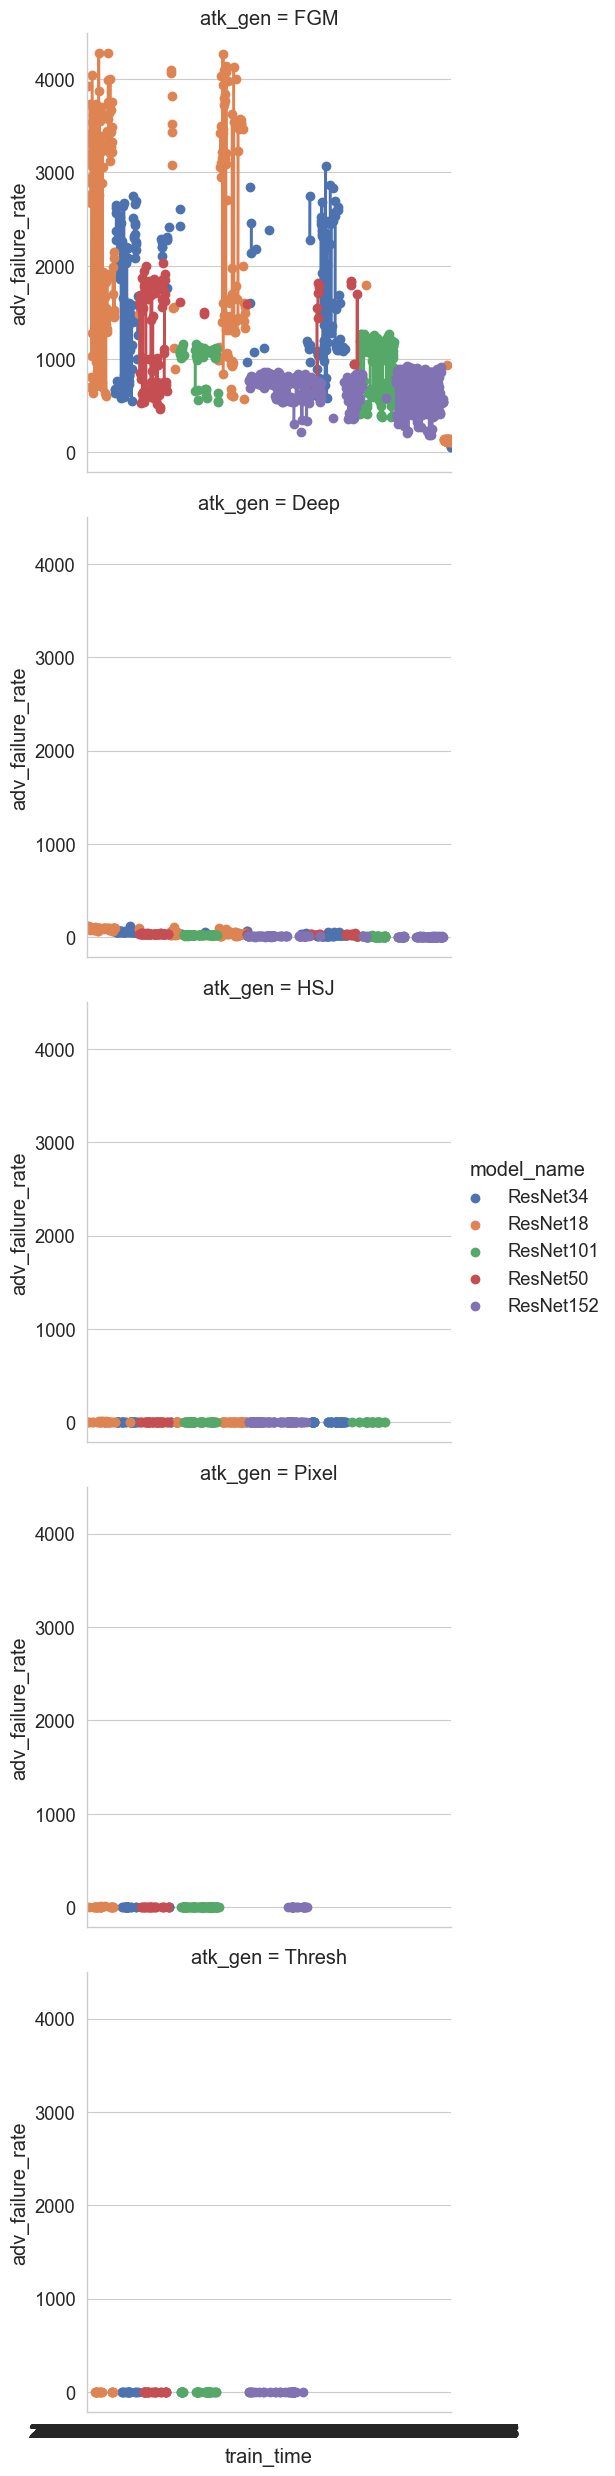

In [5]:
# graph = sns.catplot(data=data, x='train_time', y='adv_failure_rate', hue='model_name', kind='boxen', row='def_gen', col='atk_gen', n_boot=10)
graph = sns.catplot(data=data, x='train_time', y='adv_failure_rate', hue='model_name', kind='point', row='atk_gen', n_boot=10)

In [ ]:
def cat_plot(
    data,
    x,
    y,
    hue,
    kind,
    titles,
    xlabels,
    ylabels,
    legend_title,
    file,
    folder,
    hue_order=None,
    rotation=0,
    set={},
    **kwargs,
):
    plt.gcf().clear()
    data = data.sort_values(by=[hue, x, y])
    graph = sns.catplot(
        data=data, x=x, y=y, hue=hue, kind=kind, hue_order=hue_order, **kwargs
    )
    graph.set_xlabels(xlabels)
    graph.set_ylabels(ylabels)
    graph.set_titles(titles)
    graph.legend.set_title(title=legend_title)
    graph.set_xticklabels(graph.axes.flat[-1].get_xticklabels(), rotation=rotation)
    graph.set(**set)
    graph.tight_layout()
    graph.savefig(folder / file)
    plt.gcf().clear()
    # logger.info(f"Saved graph to {folder / file}")

cat_plot(data, x='train_time', y='adv_failure_rate', hue='model_name', kind='point', col='atk_gen', row='def_gen', titles='{col_name} {row_name}', xlabels='Training time (s)', ylabels='Adversarial failure rate', legend_title='Model', file='train_time_adv_failure_rate.png', folder='output/plots', rotation=90, set={'xscale': 'log'})

KeyboardInterrupt: 